<a href="https://colab.research.google.com/github/Tuchsanai/152-478-Introduction-to-Deep-Learning-for-Artificial-Intelligence-Engineering/blob/main/05_Image_Video_OpenCV/05_yolov5/yolov5_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from skimage import io
from skimage import io
import matplotlib.pyplot as plt

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-1-28 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


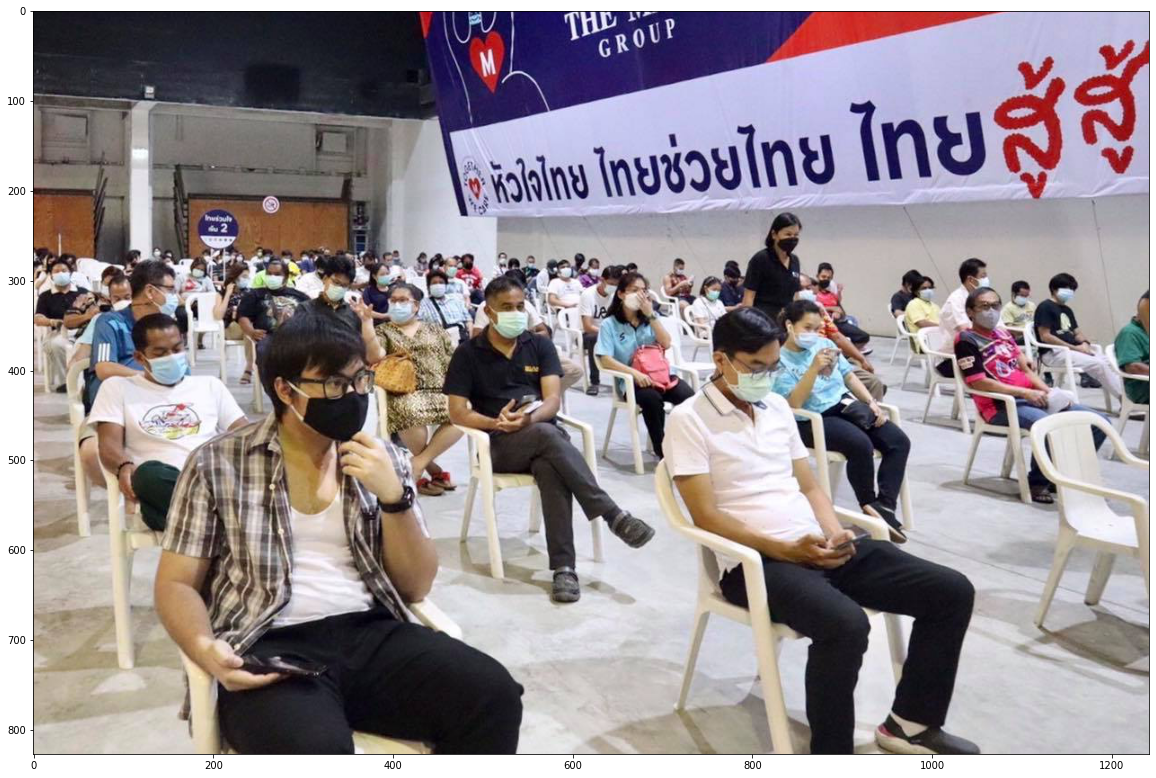

In [5]:
url = "https://raw.githubusercontent.com/Tuchsanai/152-478-Introduction-to-Deep-Learning-for-Artificial-Intelligence-Engineering/main/05_Image_Video_OpenCV/05_yolov5/demo1.jpg"

img = io.imread(url)

plt.figure(figsize=(20,20))
plt.imshow(img)

In [15]:
# Inference
results = model(img)



/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [16]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,134.402359,313.743225,540.760620,820.144714,0.898517,0,person
1,710.120728,357.270996,1053.482666,827.000000,0.821641,0,person
2,465.143280,312.850037,688.515442,651.300659,0.726516,0,person
3,841.479431,338.795197,985.744995,579.130920,0.679577,0,person
4,61.885666,335.511169,241.937454,583.517090,0.632147,0,person
5,703.471436,525.957336,860.742371,810.794434,0.556289,56,chair
6,1112.288452,464.012360,1241.089844,691.243286,0.550751,56,chair
7,3.582083,289.414551,62.440166,430.236603,0.314928,0,person
8,100.951180,267.073486,127.826134,306.570435,0.290668,0,person
9,321.920227,269.342346,370.903656,318.023804,0.252921,0,person


In [14]:
# Results
results.print()  
results.save("results")  # or .show()

image 1/1: 827x1242 13 persons, 7 chairs
Speed: 28.3ms pre-process, 396.8ms inference, 15.0ms NMS per image at shape (1, 3, 448, 640)
Saved 1 image to results
